In [14]:
import requests
import pandas as pd

# API Credentials & Search Term
api_key = "9E5D292B07EA4FED8518C738B871D099"
search_term = "Nike shoes"  # Example category

# API Request
url = f"https://api.bluecartapi.com/request?api_key={api_key}&type=search&search_term={search_term}"
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    data = response.json()

    # Debug: Print API Response
    print("API Response:", data)

    # Extract Product Data
    if "search_results" in data:
        product_data = []
        for result in data["search_results"]:
            product = result.get("product", {})
            inventory = result.get("inventory", {})
            offers = result.get("offers", {})
            primary_offer = offers.get("primary", {})

            product_info = {
                "title": product.get("title"),
                "price": primary_offer.get("price"),
                "in_stock": inventory.get("in_stock", False),  # Use in_stock as a proxy for supply
                "ratings_total": product.get("ratings_total", 0),  # Use ratings_total as a proxy for demand
                "best_seller": product.get("best_seller", False),  # Use best_seller as a proxy for demand
                "seller_name": primary_offer.get("seller", {}).get("name", "Unknown")  # Include seller name
            }
            product_data.append(product_info)
        
        # Convert to DataFrame
        df = pd.DataFrame(product_data)

        # Debug: Print DataFrame
        print("Product Data:")
        print(df)

        # Define High Demand and Low Supply Criteria
        # High Demand: Products with high ratings_total or marked as best_seller
        # Low Supply: Products not in stock (in_stock == False)
        df_filtered = df[
            (df["in_stock"] == False) &  # Low supply (not in stock)
            ((df["ratings_total"] > 1000) | (df["best_seller"] == True))  # High demand
        ]

        # Save Results
        df_filtered.to_csv("high_demand_low_supply_products.csv", index=False)
        print("Filtered data saved successfully!")
    else:
        print("No product data found in API response.")
else:
    print(f"API request failed with status code {response.status_code}")

API Response: {'request_info': {'success': True, 'credits_used': 19, 'credits_remaining': 81, 'credits_used_this_request': 1}, 'request_parameters': {'type': 'search', 'search_term': 'Nike shoes'}, 'request_metadata': {'created_at': '2025-02-18T01:07:06.829Z', 'processed_at': '2025-02-18T01:07:10.123Z', 'total_time_taken': 3.29, 'walmart_url': 'https://www.walmart.com/search?q=Nike+shoes'}, 'search_results': [{'position': 1, 'product': {'title': "(Men's) Nike Dunk Low Retro 'Panda' (2021) DD1391-100", 'link': 'https://www.walmart.com/ip/NIKE-Mens-Dunk-Low-Retro-Basketball-Shoe-Adult-White-Black-White-10/1554803460?classType=VARIANT', 'description': "<li>Gender: Men's</li><li>Product Name: Dunk Low Retro</li><li>Color: White/Black-White</li>", 'brand': 'Nike', 'item_id': '1554803460', 'product_id': '5KNYNPG45QF9', 'images': ['https://i5.walmartimages.com/seo/NIKE-Mens-Dunk-Low-Retro-Basketball-Shoe-Adult-White-Black-White-10_5ab2eede-7eb1-4053-8761-70acad30b202.1c01433a776a0d43a51537521

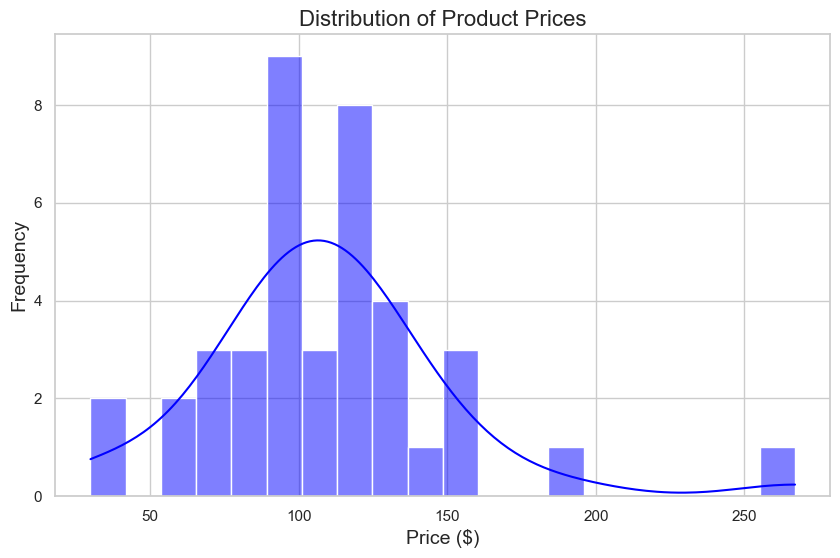

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=20, kde=True, color="blue")
plt.title("Distribution of Product Prices", fontsize=16)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()



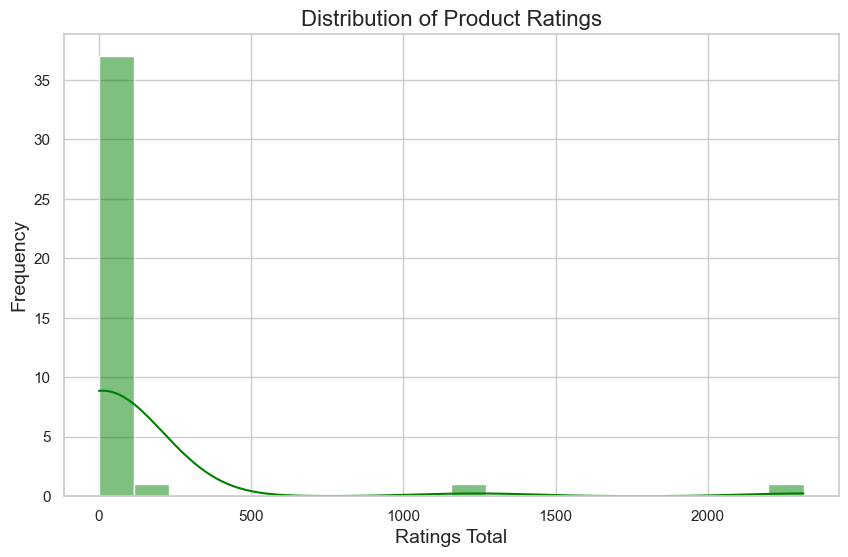

In [6]:
# 2. Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["ratings_total"], bins=20, kde=True, color="green")
plt.title("Distribution of Product Ratings", fontsize=16)
plt.xlabel("Ratings Total", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

/var/folders/wn/07prvhn92pjb0pq01vtf8v340000gn/T/ipykernel_21432/591162246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_counts.index, y=seller_counts.values, palette="viridis")


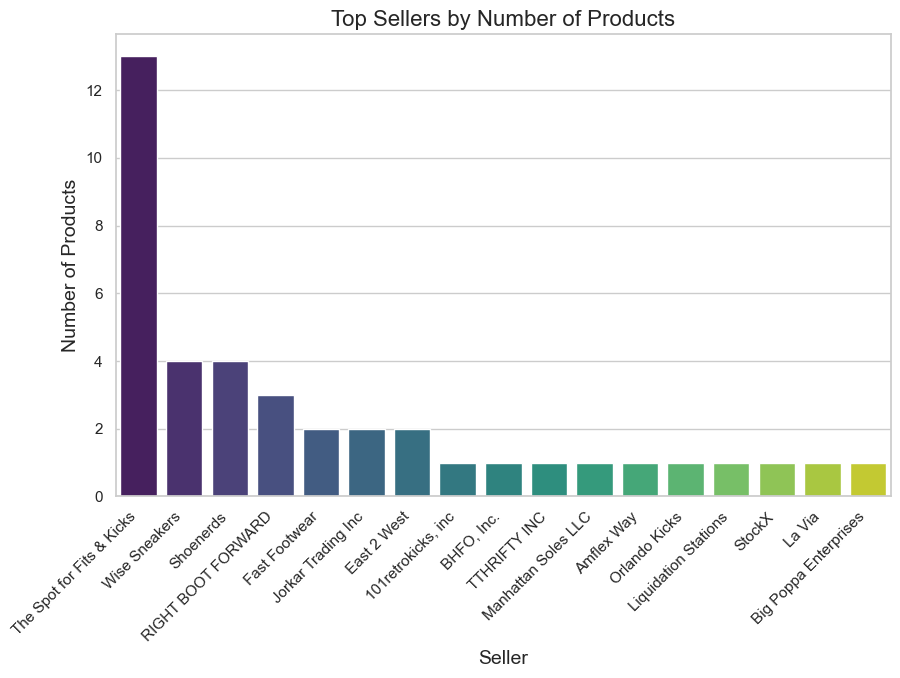

In [8]:
# 3. Top Sellers
seller_counts = df["seller_name"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=seller_counts.index, y=seller_counts.values, palette="viridis")
plt.title("Top Sellers by Number of Products", fontsize=16)
plt.xlabel("Seller", fontsize=14)
plt.ylabel("Number of Products", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

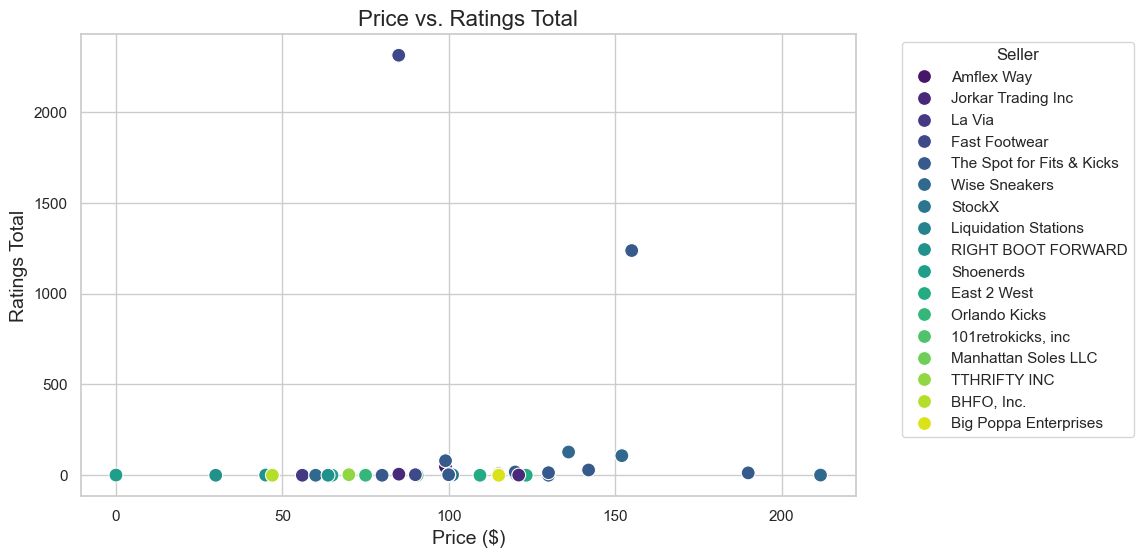

In [10]:
# 4. Price vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["price"], y=df["ratings_total"], hue=df["seller_name"], palette="viridis", s=100)
plt.title("Price vs. Ratings Total", fontsize=16)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Ratings Total", fontsize=14)
plt.legend(title="Seller", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()